In [ ]:
!pip install selenium
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin

     |████████████████████████████████| 911kB 3.2MB/s 
Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Get:5 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Hit:8 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Hit:9 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:11 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease [15.

In [ ]:
import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
from selenium import webdriver
from tqdm import tqdm_notebook as tqdm
import pandas
import json
import pprint

In [ ]:
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


**Iniziamo lo scraping su sportlter prendendo la sezione Uomo.**

In [ ]:
import time
wd = webdriver.Chrome('chromedriver',chrome_options=chrome_options)
wd.get("https://www.sportler.com/it/l/abbigliamento-running-uomo?pageResults=24&page=1")
time.sleep(3)
wd.find_element_by_css_selector("button.iubenda-cs-accept-btn.iubenda-cs-btn-primary").click()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: use options instead of chrome_options
  


Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f', 'randint']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


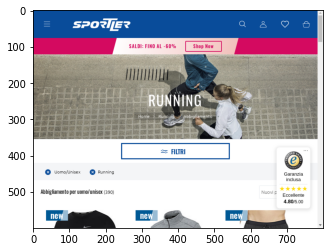

In [ ]:
wd.save_screenshot('screenshot.png')

%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread('/content/screenshot.png')
imgplot = plt.imshow(img)
plt.show()

In [ ]:
list_items = wd.find_elements_by_css_selector("div.singleProductBox")

In [ ]:
%%html
<marquee style='width: 10%; color: orange;'><b>Let's Parse!</b></marquee>
<marquee style='width: 10%; color: blue;'><b>Let's Parse!</b></marquee>
<marquee style='width: 10%; color: pink;'><b>Let's Parse!</b></marquee>
<marquee style='width: 10%; color: gold;'><b>Let's Parse!</b></marquee>
<marquee style='width: 10%; color: green;'><b>Let's Parse!</b></marquee>
<marquee style='width: 10%; color: black;'><b>Let's Parse!</b></marquee>
<marquee style='width: 10%; color: purple;'><b>Let's Parse!</b></marquee>
<marquee style='width: 10%; color: brown;'><b>Let's Parse!</b></marquee>
<marquee style='width: 10%; color: silver;'><b>Let's Parse!</b></marquee>


Defining Parse function to retrieve all products ID, URL, type and Gender

In [ ]:
def parse_project(item):
  url = item.find_elements_by_css_selector("a")[0].get_attribute("href")
  #ID is in URL. There are few products with 7 digits length ID
  try: 
    id = str(re.findall(r'\D([0-9]{8})\D',url))[2:10]
    if id=="":
      id = str(re.findall(r'\D([0-9]{7})\D',url))[2:9]
  except:
    id='not exists'
  if sex == 'uomo':
    gender='man'
  else:
    gender='woman'  

  #brand=item.find_elements_by_css_selector("h1 span.text-upercase")[0].text
  #name = item.find_elements_by_xpath("//*[@id='Detail_MainForm']/div/h1/span[3]").text
  return {'url': url,
          'id': id,
          'gender':sex,
          'type':ty}


**Download link and url for all pages for women and men and all types of products 'abbigliamento' and 'scarpe'**

In [ ]:
import time
import tqdm
import pprint
import itertools
detail_items = []
sex =['uomo','donna']
type =['abbigliamento','scarpe']
for ty, sex, num in itertools.product(type,sex,range(1,18)):
  time.sleep(1)
  wd.get(f"https://www.sportler.com/it/l/{ty}-running-{sex}?pageResults=24&page={num}")
  time.sleep(2)
  #wd.save_screenshot(f'screenshot_{num}.png')
  items = list_items = wd.find_elements_by_css_selector("div.singleProductBox")
  for item in list_items:
    detail_items.append(parse_project(item))
  

print(len(detail_items))
pprint.pprint(detail_items)

Streaming output truncated to the last 5000 lines.
  'id': '10864305',
  'type': 'abbigliamento',
  'url': 'https://www.sportler.com/it/p/getfit-running-wind-giacca-running-uomo-10864305?filterFarbe=Black'},
 {'gender': 'uomo',
  'id': '10839716',
  'type': 'abbigliamento',
  'url': 'https://www.sportler.com/it/p/adidas-fast-gfx-maglia-running-a-maniche-lunghe-uomo-10839716?filterFarbe=Black'},
 {'gender': 'uomo',
  'id': '10865279',
  'type': 'abbigliamento',
  'url': 'https://www.sportler.com/it/p/salomon-outline-mid-giacca-in-pile-uomo-10865279?filterFarbe=Green'},
 {'gender': 'uomo',
  'id': '10869815',
  'type': 'abbigliamento',
  'url': 'https://www.sportler.com/it/p/icebreaker-anatomica-briefs-slip-funzionale-uomo-10869815?filterFarbe=Black'},
 {'gender': 'uomo',
  'id': '10865500',
  'type': 'abbigliamento',
  'url': 'https://www.sportler.com/it/p/uyn-motyon-2.0-maglietta-tecnica-uomo-10865500?filterFarbe=Black'},
 {'gender': 'uomo',
  'id': '10839718',
  'type': 'abbigliamento

In [ ]:
print(len(detail_items))

1305


# Pandas time



In [ ]:
import pandas as pd
ds_detail_projects = pd.DataFrame(detail_items)
ds_detail_projects.set_index("id")
ds_detail_projects.head()

,url,id,gender,type
0,https://www.sportler.com/it/p/nike-dri-fit-mil...,10886958,uomo,abbigliamento
1,https://www.sportler.com/it/p/nike-pacer-1-2-z...,10886946,uomo,abbigliamento
2,https://www.sportler.com/it/p/nike-flex-stride...,10886961,uomo,abbigliamento
3,https://www.sportler.com/it/p/nike-flex-stride...,10842942,uomo,abbigliamento
4,https://www.sportler.com/it/p/adidas-yg-essent...,10893181,uomo,abbigliamento


In [ ]:
df = ds_detail_projects
print(len(df.index)) #N. of Rows 1305 - Expected 1069-->looping in one row for different pages
 #caused duplicated becuase different length of pages

ids = df["id"]
df[ids.isin(ids[ids.duplicated()])]
print(len(df.index))
df = df.drop_duplicates(subset='id', keep='first', inplace=False, ignore_index=False)
print(len(df.index))
#1068 after removing duplicates. There was a product (1 man pair shoes) present in 2 different sections - Kept the first one



1305
1305
1068


In [ ]:
df.to_csv('ds_projects.csv')


# Sportler Project pages ###



In [ ]:
# open csv file
import pandas as pd
ds_detail_projects = pd.read_csv("ds_projects.csv", index_col="id")
ds_detail_projects.head()

,Unnamed: 0,url,name,brand,colour,Detail,Material,Sex,tipo
id,,,,,,,,,
10886958,0,https://www.sportler.com/it/p/nike-dri-fit-mil...,Dri-FIT Miler Wild Run Graphic Running - magli...,NIKE,Black,Maglia running da uomo Dri-FIT Miler Wild Run ...,Composizione 100% polyester,uomo,abbigliamento
10886946,1,https://www.sportler.com/it/p/nike-pacer-1-2-z...,Pacer 1/2-Zip Running - maglia running a manic...,NIKE,Grey,Maglia running a maniche lunghe da uomo Pacer ...,Composizione 100% polyester,uomo,abbigliamento
10886961,2,https://www.sportler.com/it/p/nike-flex-stride...,"Flex Stride 5"" Brief Running - pantaloni runni...",NIKE,Black,"Pantaloni running da uomo Flex Stride 5"" Brief...",Composizione 100% polyester,uomo,abbigliamento
10842942,3,https://www.sportler.com/it/p/nike-flex-stride...,"Flex Stride 5"" Trail - pantaloni trail running...",NIKE,Green,"Pantaloni trail running da uomo Flex Stride 5""...",Composizione 100% recycled polyester,uomo,abbigliamento
10893181,4,https://www.sportler.com/it/p/adidas-yg-essent...,YG Essentials Linear - pantaloni lunghi fitnes...,ADIDAS,Black,"YG Essentials Linear Tight di Adidas, leggings...","Composizione 92% cotton, 8% elastane",uomo,abbigliamento


***For each project we go to the link... how do you think we do it?***

Let's try the first 5 projects.



These days most of the web apps are using AJAX techniques. When a page is loaded by the browser, the elements within that page may load at different time intervals. Using waits, we can stop our scraping and wait the loading of a element.

Selenium Webdriver provides two types of waits - implicit & explicit. An explicit wait makes WebDriver wait for a certain condition to occur before proceeding further with execution. An implicit wait makes WebDriver poll the DOM for a certain amount of time when trying to locate an element.


In [ ]:
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time
import regex
from tqdm import tqdm
from random import randint

details = []
for id, project in tqdm(ds_detail_projects.iterrows(), total=ds_detail_projects.shape[0]):
    gender= project["gender"]
    link = project["url"]
    tipo =project['type']
    brand = ""
    name = ""
    colour=""
    Detail=""
    Material=""
    print(link)
   # try:
    wd.set_window_size(1920, 1080)
    wd.get(link)
    try:
      WebDriverWait(wd, 6).until(
          EC.element_to_be_clickable((By.ID, "PutItemInWkMainBtn"))
      )
    except:
      continue
   #   try:
   #     WebDriverWait(wd, 10).until(
   #          EC.element_to_be_clickable((By.ID, "back-project-button"))
   #     )
   #   except:
   #     continue
    wd.save_screenshot(f'screenshot_{id}.png')
    brand = wd.find_elements_by_css_selector("span.text-upercase.shades-text.text-greydarkText")
    name = wd.find_elements_by_css_selector('div h1 span[itemprop=name]')#mettere [0]
    colour = wd.find_elements_by_css_selector("div.full")#mettere [0]
    Detail = wd.find_elements_by_css_selector('div.prodDetailDesc')
    Material = wd.find_elements_by_css_selector('span.td') #mettere [0]   
    try:
      if(len(brand) > 0):
        brand = brand[0].text
    except:
      pass
    try:
      if(len(name) > 0):
        name = name[0].text
    except:
      pass      
    try:
      colore=[]
      for i in range(1, len(colour)):
       colore.append(colour[i-1].text.replace("\n","-"))
    except:
      pass
    try:
      if(len(Detail) > 0):
        Detail = Detail[0].text
    except:
      pass      
    try:
      if(len(Material) > 0):
        Material = Material[0].text
    except:
      pass

   # except Exception as e:
    #  print(e)
    details.append({'id': id,
                    'url': link,
                    'name': name,
                    'brand': brand,
                    'colour': colore,
                    'Detail': Detail,
                    'Material': Material,
                    'Sex':gender,
                    'tipo':tipo,
                    })
    
  
print(len(details))
pprint.pprint(details)


  0%|          | 0/1066 [00:00<?, ?it/s]

https://www.sportler.com/it/p/nike-dri-fit-miler-wild-run-graphic-running-maglia-running-uomo-10886958?filterFarbe=Black


  0%|          | 1/1066 [00:01<33:38,  1.90s/it]

https://www.sportler.com/it/p/nike-pacer-1-2-zip-running-maglia-running-a-maniche-lunghe-uomo-10886946?filterFarbe=Grey


  0%|          | 2/1066 [00:03<31:15,  1.76s/it]

https://www.sportler.com/it/p/nike-flex-stride-5-brief-running-pantaloni-running-uomo-10886961?filterFarbe=Black


  0%|          | 3/1066 [00:04<29:57,  1.69s/it]

https://www.sportler.com/it/p/nike-flex-stride-5-trail-pantaloni-trail-running-uomo-10842942?filterFarbe=Green


  0%|          | 4/1066 [00:06<28:47,  1.63s/it]

https://www.sportler.com/it/p/adidas-yg-essentials-linear-pantaloni-lunghi-fitness-bambino-10893181?filterFarbe=Black


  0%|          | 5/1066 [00:07<27:00,  1.53s/it]

https://www.sportler.com/it/p/adidas-own-the-run-pantaloni-corti-running-uomo-10892539?filterFarbe=Black


  1%|          | 6/1066 [00:08<25:52,  1.46s/it]

https://www.sportler.com/it/p/adidas-adi-runner-maglia-running-uomo-10892532?filterFarbe=Grey


  1%|          | 7/1066 [00:10<25:18,  1.43s/it]

https://www.sportler.com/it/p/nike-techknit-future-fast-run-maglia-running-uomo-10886945?filterFarbe=Green


  1%|          | 8/1066 [00:11<25:12,  1.43s/it]

https://www.sportler.com/it/p/adidas-terrex-agravic-all.around-maglia-trail-running-uomo-10892648?filterFarbe=White


  1%|          | 9/1066 [00:14<30:24,  1.73s/it]

https://www.sportler.com/it/p/adidas-terrex-agravic-all.around-pantaloni-corti-trail-running-uomo-10892649?filterFarbe=Black


  1%|          | 10/1066 [00:15<28:38,  1.63s/it]

https://www.sportler.com/it/p/nike-dri-fit-miler-maglia-running-uomo-10886960?filterFarbe=Red


  1%|          | 11/1066 [00:16<27:35,  1.57s/it]

https://www.sportler.com/it/p/nike-breathe-rise-365-hybrid-maglia-running-uomo-10886939?filterFarbe=Blue


  1%|          | 12/1066 [00:18<26:41,  1.52s/it]

https://www.sportler.com/it/p/nike-run-division-adapt-running-top-running-uomo-10886947?filterFarbe=Black


  1%|          | 13/1066 [00:19<26:02,  1.48s/it]

https://www.sportler.com/it/p/nike-dri-fit-full-zip-training-hoodie-giacca-running-uomo-10898280?filterFarbe=Black


  1%|▏         | 14/1066 [00:21<25:37,  1.46s/it]

https://www.sportler.com/it/p/nike-dri-fit-miler-running-top-running-uomo-10886941?filterFarbe=Red


  1%|▏         | 15/1066 [00:22<25:20,  1.45s/it]

https://www.sportler.com/it/p/nike-flex-stride-7-2-in-1-running-pantaloni-running-uomo-10898276?filterFarbe=Black


  2%|▏         | 16/1066 [00:26<36:20,  2.08s/it]

https://www.sportler.com/it/p/icebreaker-zona-anatomica-lunga-boxer-uomo-10921362?filterFarbe=Black


  2%|▏         | 17/1066 [00:27<32:55,  1.88s/it]

https://www.sportler.com/it/p/uyn-activyon-running-pantaloni-corti-running-uomo-10865522?filterFarbe=Black


  2%|▏         | 18/1066 [00:28<30:21,  1.74s/it]

https://www.sportler.com/it/p/rab-scree-gaiter-ghette-10846115?filterFarbe=Grey


  2%|▏         | 19/1066 [00:30<27:41,  1.59s/it]

https://www.sportler.com/it/p/dynafit-speed-w-reggiseno-sportivo-a-sostegno-elevato-donna-10895682?filterFarbe=Black%2FPink


  2%|▏         | 20/1066 [00:31<26:33,  1.52s/it]

https://www.sportler.com/it/p/dynafit-transalper-dst-jeans-pantaloni-corti-trail-running-uomo-10872135?filterFarbe=Black%2FGreen


  2%|▏         | 21/1066 [00:34<35:49,  2.06s/it]

https://www.sportler.com/it/p/nike-aeroswift-running-top-running-uomo-10877243?filterFarbe=Black


  2%|▏         | 22/1066 [00:36<32:33,  1.87s/it]

https://www.sportler.com/it/p/nike-aeroswift-2-running-pantaloni-corti-running-uomo-10877245?filterFarbe=Black


  2%|▏         | 23/1066 [00:37<30:21,  1.75s/it]

https://www.sportler.com/it/p/nike-aeroswift-running-pantaloni-corti-running-uomo-10877246?filterFarbe=Black


  2%|▏         | 24/1066 [00:39<28:51,  1.66s/it]

https://www.sportler.com/it/p/uyn-activeyon-running-top-running-uomo-10865520?filterFarbe=Green


  2%|▏         | 25/1066 [00:40<27:34,  1.59s/it]

https://www.sportler.com/it/p/uyn-running-activyon-maglia-running-uomo-10846108?filterFarbe=Dark+Green


  2%|▏         | 26/1066 [00:42<26:45,  1.54s/it]

https://www.sportler.com/it/p/uyn-running-activyon-2.0-pantaloni-corti-running-donna-10857374?filterFarbe=Black


  3%|▎         | 27/1066 [00:43<26:12,  1.51s/it]

https://www.sportler.com/it/p/getfit-running-low-calzini-corti-running-10902557?filterFarbe=Black%2FGrey%2FGreen


  3%|▎         | 28/1066 [00:47<38:18,  2.21s/it]

https://www.sportler.com/it/p/uyn-marathon-maglia-running-uomo-10908485?filterFarbe=Black


  3%|▎         | 29/1066 [00:48<34:51,  2.02s/it]

https://www.sportler.com/it/p/biciclista-mascherina-protettiva-10903271?filterFarbe=Blue%2FYellow


  3%|▎         | 30/1066 [00:50<31:49,  1.84s/it]

https://www.sportler.com/it/p/biciclista-mascherina-protettiva-10903275?filterFarbe=Green%2FOrange


  3%|▎         | 31/1066 [00:51<29:22,  1.70s/it]

https://www.sportler.com/it/p/bv-sport-rtech-maglia-running-a-compressione-uomo-10872765?filterFarbe=Black%2FGrey


  3%|▎         | 32/1066 [00:53<27:51,  1.62s/it]

https://www.sportler.com/it/p/bv-sport-triathlon-3x100-completo-triathlon-uomo-10872769?filterFarbe=White%2FRed%2FBlack


  3%|▎         | 33/1066 [00:54<26:20,  1.53s/it]

https://www.sportler.com/it/p/bv-sport-trifonction-3x200-completo-triathlon-uomo-10872766?filterFarbe=White%2FBlack%2FRed


  3%|▎         | 34/1066 [00:55<25:09,  1.46s/it]

https://www.sportler.com/it/p/karpos-lavaredo-pantaloni-trailrunning-uomo-10899771?filterFarbe=Black


  3%|▎         | 35/1066 [00:57<24:51,  1.45s/it]

https://www.sportler.com/it/p/karpos-lavaredo-pantaloni-corti-trail-running-uomo-10899763?filterFarbe=Black


  3%|▎         | 36/1066 [00:58<24:27,  1.42s/it]

https://www.sportler.com/it/p/karpos-lavaredo-tech-maglia-trail-running-uomo-10873983?filterFarbe=Blue


  3%|▎         | 37/1066 [01:00<24:38,  1.44s/it]

https://www.sportler.com/it/p/rab-sonic-ss-zip-t-shirt-tecnica-uomo-10872758?filterFarbe=Blue


  4%|▎         | 38/1066 [01:01<24:00,  1.40s/it]

https://www.sportler.com/it/p/uyn-run-active-2-pack-calzini-running-10900995?filterFarbe=White%2FBlack


  4%|▎         | 39/1066 [01:02<23:47,  1.39s/it]

https://www.sportler.com/it/p/uyn-running-activyon-top-running-uomo-10898285?filterFarbe=Black


  4%|▍         | 40/1066 [01:05<28:22,  1.66s/it]

https://www.sportler.com/it/p/dynafit-speed-dryarn-m-pantaloni-corti-trailrunning-a-compressione-uomo-10895438?filterFarbe=Black%2FGrey


  4%|▍         | 41/1066 [01:06<26:39,  1.56s/it]

https://www.sportler.com/it/p/rab-pulse-ss-maglietta-tecnica-uomo-10872741?filterFarbe=Blue


  4%|▍         | 42/1066 [01:07<25:31,  1.50s/it]

https://www.sportler.com/it/p/buff-coolnet-uv-insect-scaldacollo-10864009?filterFarbe=Grey%2FGreen


  4%|▍         | 43/1066 [01:09<25:19,  1.49s/it]

https://www.sportler.com/it/p/odlo-ceramicool-pro-t-shirt-uomo-10894151?filterFarbe=Green


  4%|▍         | 44/1066 [01:10<24:56,  1.46s/it]

https://www.sportler.com/it/p/uyn-energyon-uw-maglietta-tecnica-senza-maniche-uomo-10865580?filterFarbe=Black


  4%|▍         | 45/1066 [01:12<24:46,  1.46s/it]

https://www.sportler.com/it/p/uyn-energy-on-uw-maglietta-tecnica-uomo-10862928?filterFarbe=Black


  4%|▍         | 46/1066 [01:13<24:48,  1.46s/it]

https://www.sportler.com/it/p/under-armour-launch-sw-7-graphic-pantaloni-corti-running-uomo-10840932?filterFarbe=Black


  4%|▍         | 47/1066 [01:14<24:45,  1.46s/it]

https://www.sportler.com/it/p/buff-coolnet-uv-slim-fascia-paraorecchie-10864287?filterFarbe=Green


  5%|▍         | 48/1066 [01:16<24:18,  1.43s/it]

https://www.sportler.com/it/p/buff-coolnet-uv-multifunctional-fascia-paraorecchie-10864298?filterFarbe=Grey


  5%|▍         | 49/1066 [01:17<24:24,  1.44s/it]

https://www.sportler.com/it/p/buff-coolnet-uv-fascia-paraorecchie-10864286?filterFarbe=Green


  5%|▍         | 50/1066 [01:19<25:01,  1.48s/it]

https://www.sportler.com/it/p/buff-hairband-fascia-per-capelli-10864299?filterFarbe=Pink%2FBlue%2FViolet


  5%|▍         | 51/1066 [01:21<30:13,  1.79s/it]

https://www.sportler.com/it/p/buff-pro-run-cappellino-trail-running-uomo-10863988?filterFarbe=Black


  5%|▍         | 52/1066 [01:23<27:37,  1.63s/it]

https://www.sportler.com/it/p/buff-original-scaldacollo-10892798?filterFarbe=Blue%2FBlack


  5%|▍         | 53/1066 [01:24<27:03,  1.60s/it]

https://www.sportler.com/it/p/nike-element-running-giacca-running-uomo-10836690?filterFarbe=Black


  5%|▌         | 54/1066 [01:26<26:01,  1.54s/it]

https://www.sportler.com/it/p/under-armour-launch-sw-5-graphic-pantaloni-corti-running-uomo-10840931?filterFarbe=Black


  5%|▌         | 55/1066 [01:27<25:26,  1.51s/it]

https://www.sportler.com/it/p/getfit-running-wind-giacca-running-uomo-10864305?filterFarbe=Black


  5%|▌         | 56/1066 [01:29<27:05,  1.61s/it]

https://www.sportler.com/it/p/adidas-fast-gfx-maglia-running-a-maniche-lunghe-uomo-10839716?filterFarbe=Black


  5%|▌         | 57/1066 [01:30<25:50,  1.54s/it]

https://www.sportler.com/it/p/salomon-outline-mid-giacca-in-pile-uomo-10865279?filterFarbe=Green


  5%|▌         | 58/1066 [01:32<25:04,  1.49s/it]

https://www.sportler.com/it/p/icebreaker-anatomica-briefs-slip-funzionale-uomo-10869815?filterFarbe=Black


  6%|▌         | 59/1066 [01:33<24:57,  1.49s/it]

https://www.sportler.com/it/p/uyn-motyon-2.0-maglietta-tecnica-uomo-10865500?filterFarbe=Black


  6%|▌         | 60/1066 [01:35<24:56,  1.49s/it]

https://www.sportler.com/it/p/adidas-own-the-run-2n1-pantaloni-running-uomo-10839718?filterFarbe=Black%2FRed


  6%|▌         | 61/1066 [01:38<33:46,  2.02s/it]

https://www.sportler.com/it/p/on-lightweight-pantaloni-corti-running-uomo-10838392?filterFarbe=Black


  6%|▌         | 62/1066 [01:39<30:19,  1.81s/it]

https://www.sportler.com/it/p/x-bionic-energizer-mk3-lt-singlet-maglietta-tecnica-uomo-10756200?filterFarbe=Black


  6%|▌         | 63/1066 [01:42<34:14,  2.05s/it]

https://www.sportler.com/it/p/odlo-millennium-linencool-maglia-running-uomo-10839967?filterFarbe=Grey


  6%|▌         | 64/1066 [01:47<47:47,  2.86s/it]

https://www.sportler.com/it/p/dynafit-alpine-2-pantaloni-corti-trail-running-uomo-10872120?filterFarbe=Black%2FDark+Grey


  6%|▌         | 65/1066 [01:48<40:40,  2.44s/it]

https://www.sportler.com/it/p/odlo-2-in-1-millennium-pro-pantaloni-running-uomo-10839964?filterFarbe=Black


  6%|▌         | 66/1066 [01:55<1:01:42,  3.70s/it]

https://www.sportler.com/it/p/salomon-exo-motion-twinskin-pantaloni-trail-running-uomo-10839241?filterFarbe=Red


  6%|▋         | 67/1066 [01:56<50:37,  3.04s/it]  

https://www.sportler.com/it/p/adidas-own-the-run-maglia-running-uomo-10839713?filterFarbe=White


  6%|▋         | 68/1066 [01:57<42:15,  2.54s/it]

https://www.sportler.com/it/p/adidas-otr-singlet-3s-top-running-uomo-10839939?filterFarbe=Orange


  6%|▋         | 69/1066 [01:59<36:58,  2.23s/it]

https://www.sportler.com/it/p/getfit-perry-pantaloni-running-uomo-10864302?filterFarbe=Black


  7%|▋         | 70/1066 [02:00<33:10,  2.00s/it]

https://www.sportler.com/it/p/getfit-brent-top-running-uomo-10864297?filterFarbe=Grey


  7%|▋         | 71/1066 [02:02<29:59,  1.81s/it]

https://www.sportler.com/it/p/getfit-dorian-maglia-running-uomo-10864296?filterFarbe=Light+Blue


  7%|▋         | 72/1066 [02:04<33:51,  2.04s/it]

https://www.sportler.com/it/p/getfit-billy-5-pantaloni-corti-running-uomo-10864301?filterFarbe=Black


  7%|▋         | 73/1066 [02:07<38:13,  2.31s/it]

https://www.sportler.com/it/p/getfit-quentin-maglia-running-uomo-10864303?filterFarbe=Grey


  7%|▋         | 74/1066 [02:09<34:25,  2.08s/it]

https://www.sportler.com/it/p/nike-running-pantaloni-running-uomo-10829938?filterFarbe=Black


  7%|▋         | 75/1066 [02:10<30:54,  1.87s/it]

https://www.sportler.com/it/p/la-sportiva-advance-maglia-trail-running-uomo-10618422?filterFarbe=Light+Blue%2FBlue


  7%|▋         | 76/1066 [02:12<28:30,  1.73s/it]

https://www.sportler.com/it/p/la-sportiva-vert-top-trail-running-uomo-10839349?filterFarbe=Yellow


  7%|▋         | 77/1066 [02:13<27:17,  1.66s/it]

https://www.sportler.com/it/p/la-sportiva-slipstream-top-trail-running-uomo-10839346?filterFarbe=Black%2FYellow


  7%|▋         | 78/1066 [02:15<26:19,  1.60s/it]

https://www.sportler.com/it/p/la-sportiva-stream-maglia-trail-running-uomo-10839351?filterFarbe=Yellow%2FGrey


  7%|▋         | 79/1066 [02:16<25:22,  1.54s/it]

https://www.sportler.com/it/p/la-sportiva-complex-maglia-trail-running-uomo-10839352?filterFarbe=Blue%2FRed


  8%|▊         | 80/1066 [02:18<25:06,  1.53s/it]

https://www.sportler.com/it/p/la-sportiva-wave-maglia-trail-running-uomo-10839347?filterFarbe=Black%2FYellow


  8%|▊         | 81/1066 [02:19<25:15,  1.54s/it]

https://www.sportler.com/it/p/dynafit-elevation-maglia-trail-running-uomo-10872131?filterFarbe=Blue%2FLight+Blue


  8%|▊         | 82/1066 [02:23<35:20,  2.15s/it]

https://www.sportler.com/it/p/bv-sport-arx-manicotti-a-compressione-10872775?filterFarbe=Black


  8%|▊         | 83/1066 [02:24<31:22,  1.92s/it]

https://www.sportler.com/it/p/bv-sport-booster-original-gambali-compressivi-10845873?filterFarbe=Black


  8%|▊         | 84/1066 [02:25<28:55,  1.77s/it]

https://www.sportler.com/it/p/bv-sport-quadshort-csx-pantaloni-running-a-compressione-uomo-10872757?filterFarbe=Black


  8%|▊         | 85/1066 [02:27<27:21,  1.67s/it]

https://www.sportler.com/it/p/bv-sport-quadshort-csx-light-pantaloni-corti-a-compressione-uomo-10872762?filterFarbe=Black


  8%|▊         | 86/1066 [02:28<25:58,  1.59s/it]

https://www.sportler.com/it/p/bv-sport-csx-pro-pantaloni-corti-trail-running-a-compressione-uomo-10872754?filterFarbe=Black%2FGrey


  8%|▊         | 87/1066 [02:30<24:56,  1.53s/it]

https://www.sportler.com/it/p/salomon-agile-twinskin-pantaloni-corti-trail-running-uomo-10856924?filterFarbe=Light+Blue


  8%|▊         | 88/1066 [02:31<24:27,  1.50s/it]

https://www.sportler.com/it/p/nike-tech-pack-running-maglia-running-uomo-10830193?filterFarbe=Red


  8%|▊         | 89/1066 [02:33<24:34,  1.51s/it]

https://www.sportler.com/it/p/nike-essential-running-giacca-running-uomo-10829936?filterFarbe=Black


  8%|▊         | 90/1066 [02:34<24:01,  1.48s/it]

https://www.sportler.com/it/p/salomon-trail-gaiter-high-ghette-trailrunning-10853460?filterFarbe=Black%2FRed


  9%|▊         | 91/1066 [02:35<23:34,  1.45s/it]

https://www.sportler.com/it/p/dynafit-alpine-maglia-trail-running-uomo-10872119?filterFarbe=Grey%2FBlack%2FYellow


  9%|▊         | 92/1066 [02:37<23:12,  1.43s/it]

https://www.sportler.com/it/p/dynafit-transalper-hybrid-pantaloni-corti-speed-hiking-uomo-10872110?filterFarbe=Green%2FGrey%2FLight+Blue


  9%|▊         | 93/1066 [02:38<23:00,  1.42s/it]

https://www.sportler.com/it/p/dynafit-glockner-ultra-shakedry-giacca-in-gore-tex-uomo-10872142?filterFarbe=Grey%2FGreen


  9%|▉         | 94/1066 [02:40<22:29,  1.39s/it]

https://www.sportler.com/it/p/salomon-agile-training-t-shirt-uomo-10838993?filterFarbe=Grey


  9%|▉         | 95/1066 [02:41<22:22,  1.38s/it]

https://www.sportler.com/it/p/gore-wear-r5-maglia-running-uomo-10839518?filterFarbe=Grey%2FGreen


  9%|▉         | 96/1066 [02:42<22:18,  1.38s/it]

https://www.sportler.com/it/p/gore-wear-r7-partial-gore-tex-infinium-gilet-running-uomo-10839516?filterFarbe=Dark+Blue%2FLight+Blue


  9%|▉         | 97/1066 [02:45<29:17,  1.81s/it]

https://www.sportler.com/it/p/nike-dri-fit-miler-running-maglia-running-uomo-10836689?filterFarbe=White


  9%|▉         | 98/1066 [02:46<27:04,  1.68s/it]

https://www.sportler.com/it/p/nike-techknit-ultra-running-maglia-running-uomo-10830189?filterFarbe=Light+Blue


  9%|▉         | 99/1066 [02:48<26:21,  1.64s/it]

https://www.sportler.com/it/p/nike-phenom-running-pantaloni-running-uomo-10840658?filterFarbe=Black


  9%|▉         | 100/1066 [02:49<25:06,  1.56s/it]

https://www.sportler.com/it/p/nike-tech-pack-running-pantaloni-running-uomo-10830191?filterFarbe=Black


  9%|▉         | 101/1066 [02:51<23:49,  1.48s/it]

https://www.sportler.com/it/p/under-armour-qualifier-iso-chill-run-singlet-top-running-uomo-10840916?filterFarbe=Black


 10%|▉         | 102/1066 [02:57<49:13,  3.06s/it]

https://www.sportler.com/it/p/under-armour-launch-sw-5-pantaloni-corti-running-uomo-10840906?filterFarbe=Black


 10%|▉         | 103/1066 [03:03<59:18,  3.70s/it]

https://www.sportler.com/it/p/under-armour-qualifier-iso-chill-printed-run-maglia-running-uomo-10840912?filterFarbe=Black


 10%|▉         | 104/1066 [03:04<48:26,  3.02s/it]

https://www.sportler.com/it/p/under-armour-streaker-2.0-shift-crew-maglia-running-uomo-10840918?filterFarbe=Black


 10%|▉         | 105/1066 [03:06<40:54,  2.55s/it]

https://www.sportler.com/it/p/under-armour-qualifier-iso-chill-run-maglia-running-uomo-10840915?filterFarbe=Black


 10%|▉         | 106/1066 [03:07<35:15,  2.20s/it]

https://www.sportler.com/it/p/under-armour-qualifier-iso-chill-printed-top-running-uomo-10840914?filterFarbe=Blue


 10%|█         | 107/1066 [03:08<31:41,  1.98s/it]

https://www.sportler.com/it/p/under-armour-storm-launch-2.0-giacca-running-uomo-10840909?filterFarbe=Black


 10%|█         | 108/1066 [03:11<32:44,  2.05s/it]

https://www.sportler.com/it/p/getfit-hi-viz-riu-calzini-running-uomo-10863409?filterFarbe=Black


 10%|█         | 109/1066 [03:12<29:23,  1.84s/it]

https://www.sportler.com/it/p/nike-dri-fit-miler-maglia-running-uomo-10829939?filterFarbe=Orange


 10%|█         | 110/1066 [03:13<27:38,  1.73s/it]

https://www.sportler.com/it/p/nike-dri-fit-miler-running-maglia-running-uomo-10829940?filterFarbe=Black


 10%|█         | 111/1066 [03:15<26:13,  1.65s/it]

https://www.sportler.com/it/p/nike-challenger-7-running-pantaloni-corti-running-uomo-10829941?filterFarbe=Black%2FWhite


 11%|█         | 112/1066 [03:16<25:16,  1.59s/it]

https://www.sportler.com/it/p/nike-dri-fit-miler-maglia-running-uomo-10830194?filterFarbe=Grey


 11%|█         | 113/1066 [03:23<49:27,  3.11s/it]

https://www.sportler.com/it/p/nike-challenger-7-running-pantaloni-corti-running-uomo-10837089?filterFarbe=Black


 11%|█         | 114/1066 [03:24<41:41,  2.63s/it]

https://www.sportler.com/it/p/nike-windrunner-running-giacca-running-uomo-10841022?filterFarbe=Grey%2FOrange


 11%|█         | 115/1066 [03:26<36:17,  2.29s/it]

https://www.sportler.com/it/p/nike-challenger-7-running-pantaloni-corti-running-uomo-10830190?filterFarbe=Black%2FGrey


 11%|█         | 116/1066 [03:29<39:03,  2.47s/it]

https://www.sportler.com/it/p/nike-tech-pack-running-maglia-running-a-maniche-lunghe-uomo-10830192?filterFarbe=Blue


 11%|█         | 117/1066 [03:30<34:18,  2.17s/it]

https://www.sportler.com/it/p/nike-long-sleeve-running-hybrid-maglia-a-maniche-lunghe-uomo-10820907?filterFarbe=Black


 11%|█         | 118/1066 [03:32<30:45,  1.95s/it]

https://www.sportler.com/it/p/nike-shield-running-giacca-running-uomo-10820584?filterFarbe=Dark+Grey


 11%|█         | 119/1066 [03:33<28:39,  1.82s/it]

https://www.sportler.com/it/p/nike-aeroloft-running-giacca-running-uomo-10832018?filterFarbe=Dark+Grey


 11%|█▏        | 120/1066 [03:35<26:53,  1.71s/it]

https://www.sportler.com/it/p/uyn-running-alpha-ow-maglia-running-uomo-10786584?filterFarbe=Black


 11%|█▏        | 121/1066 [03:36<26:00,  1.65s/it]

https://www.sportler.com/it/p/nike-phenom-running-pantaloni-running-uomo-10820902?filterFarbe=Black


 11%|█▏        | 122/1066 [03:38<24:19,  1.55s/it]

https://www.sportler.com/it/p/adidas-phx-ii-giacca-con-cappuccio-running-uomo-10788927?filterFarbe=Black


 12%|█▏        | 123/1066 [03:39<23:30,  1.50s/it]

https://www.sportler.com/it/p/nike-aeroloft-run-pantaloni-corti-running-uomo-10820585?filterFarbe=Dark+Grey


 12%|█▏        | 124/1066 [03:40<23:31,  1.50s/it]

https://www.sportler.com/it/p/uyn-cashmere-shiny-calzamaglia-uomo-10789092?filterFarbe=Grey


 12%|█▏        | 125/1066 [03:42<23:16,  1.48s/it]

https://www.sportler.com/it/p/x-bionic-energizer-4.0-p-m-calzamaglia-uomo-10791508?filterFarbe=Black


 12%|█▏        | 126/1066 [03:43<22:37,  1.44s/it]

https://www.sportler.com/it/p/nike-long-sleeve-running-felpa-running-uomo-10821214?filterFarbe=Black


 12%|█▏        | 127/1066 [03:45<22:50,  1.46s/it]

https://www.sportler.com/it/p/under-armour-rush-run-coldgear-maglia-running-con-zip-uomo-10790170?filterFarbe=Black


 12%|█▏        | 128/1066 [03:46<23:00,  1.47s/it]

https://www.sportler.com/it/p/under-armour-rush-run-coldgear-pantaloni-lunghi-running-uomo-10790171?filterFarbe=Black


 12%|█▏        | 129/1066 [03:48<22:10,  1.42s/it]

https://www.sportler.com/it/p/nike-reversible-neck-warmer-scaldacollo-10830968?filterFarbe=Black%2FGrey


 12%|█▏        | 130/1066 [03:49<21:48,  1.40s/it]

https://www.sportler.com/it/p/nike-jordan-sphere-cold-weather-guanti-10830967?filterFarbe=Black%2FGrey


 12%|█▏        | 131/1066 [03:50<21:43,  1.39s/it]

https://www.sportler.com/it/p/odlo-midlayer-1-2-zip-ceramiwarm-maglia-running-con-zip-1-2-uomo-10783254?filterFarbe=Yellow%2FLight+Grey


 12%|█▏        | 132/1066 [03:52<21:55,  1.41s/it]

https://www.sportler.com/it/p/nike-miler-long-sleeve-running-maglia-running-a-maniche-lunghe-uomo-10820911?filterFarbe=Light+Blue


 12%|█▏        | 133/1066 [03:58<46:59,  3.02s/it]

https://www.sportler.com/it/p/nike-therma-repel-running-pantaloni-running-uomo-10821217?filterFarbe=Black


 13%|█▎        | 134/1066 [04:01<45:02,  2.90s/it]

https://www.sportler.com/it/p/nike-aerolayer-run-gilet-running-uomo-10820904?filterFarbe=Black


 13%|█▎        | 135/1066 [04:02<37:47,  2.44s/it]

https://www.sportler.com/it/p/getfit-top-maglia-a-maniche-lunghe-running-uomo-10827223?filterFarbe=Black


 13%|█▎        | 136/1066 [04:04<33:29,  2.16s/it]

https://www.sportler.com/it/p/getfit-men-200-gr-pantaloni-lunghi-running-uomo-10827230?filterFarbe=Black


 13%|█▎        | 137/1066 [04:05<29:34,  1.91s/it]

https://www.sportler.com/it/p/nike-sphere-run-gloves-2.0-guanti-running-uomo-10784785?filterFarbe=Black%2FGrey


 13%|█▎        | 138/1066 [04:07<27:16,  1.76s/it]

https://www.sportler.com/it/p/nike-knitted-tech-and-grip-guanti-running-10823634?filterFarbe=Black%2FGrey


 13%|█▎        | 139/1066 [04:08<25:19,  1.64s/it]

https://www.sportler.com/it/p/nike-run-therma-sphere-hood-3.0-berretto-passamontagna-running-10784783?filterFarbe=Black%2FGrey


 13%|█▎        | 140/1066 [04:09<24:12,  1.57s/it]

https://www.sportler.com/it/p/buff-original-scaldacollo-10801283?filterFarbe=Black


 13%|█▎        | 141/1066 [04:11<23:46,  1.54s/it]

https://www.sportler.com/it/p/buff-thermonet-scaldacollo-10801285?filterFarbe=Blue%2FYellow


 13%|█▎        | 142/1066 [04:12<23:03,  1.50s/it]

https://www.sportler.com/it/p/under-armour-qualifier-camo-maglia-running-con-zip-uomo-10829011?filterFarbe=White


 13%|█▎        | 143/1066 [04:14<22:21,  1.45s/it]

https://www.sportler.com/it/p/uyn-evolutyon-calzamaglia-uomo-10789081?filterFarbe=Black


 14%|█▎        | 144/1066 [04:15<21:45,  1.42s/it]

https://www.sportler.com/it/p/uyn-ambityon-calzamaglia-uomo-10789082?filterFarbe=Grey%2FOrange%2FYellow


 14%|█▎        | 145/1066 [04:16<21:21,  1.39s/it]

https://www.sportler.com/it/p/nike-flex-stride-5-pantaloncini-running-uomo-10783230?filterFarbe=Black


 14%|█▎        | 146/1066 [04:18<22:01,  1.44s/it]

https://www.sportler.com/it/p/under-armour-qualifier-zip-maglia-running-uomo-10829020?filterFarbe=Black


 14%|█▍        | 147/1066 [04:19<21:47,  1.42s/it]

https://www.sportler.com/it/p/under-armour-outrun-the-storm-giacca-running-uomo-10829003?filterFarbe=Black


 14%|█▍        | 148/1066 [04:21<21:56,  1.43s/it]

https://www.sportler.com/it/p/under-armour-perpetual-storm-run-giacca-running-uomo-10829002?filterFarbe=Brown


 14%|█▍        | 149/1066 [04:22<21:56,  1.44s/it]

https://www.sportler.com/it/p/gore-wear-mid-long-sleeve-zip-maglia-running-con-zip-1-2-uomo-10784628?filterFarbe=Blue


 14%|█▍        | 150/1066 [04:24<22:11,  1.45s/it]

https://www.sportler.com/it/p/gore-wear-r3-mid-tights-pantaloni-running-uomo-10784641?filterFarbe=Black%2FYellow


 14%|█▍        | 151/1066 [04:25<21:36,  1.42s/it]

https://www.sportler.com/it/p/nike-dri-fit-maglia-running-uomo-10783232?filterFarbe=Black


 14%|█▍        | 152/1066 [04:26<21:07,  1.39s/it]

https://www.sportler.com/it/p/nike-flex-stride-5-running-pantaloni-corti-running-uomo-10778236?filterFarbe=Black


 14%|█▍        | 153/1066 [04:28<24:39,  1.62s/it]

https://www.sportler.com/it/p/nike-rise-365-maglia-running-uomo-10783228?filterFarbe=White


 14%|█▍        | 154/1066 [04:30<23:48,  1.57s/it]

https://www.sportler.com/it/p/nike-windrunner-giacca-running-uomo-10783227?filterFarbe=Black


 15%|█▍        | 155/1066 [04:31<22:54,  1.51s/it]

https://www.sportler.com/it/p/gore-wear-gore-tex-infinium-windstopper-gloves-guanti-running-10784652?filterFarbe=Black


 15%|█▍        | 156/1066 [04:33<22:16,  1.47s/it]

https://www.sportler.com/it/p/gore-wear-r3-thermo-tights-pantaloni-running-uomo-10784633?filterFarbe=Black


 15%|█▍        | 157/1066 [04:34<21:53,  1.45s/it]

https://www.sportler.com/it/p/gore-wear-thermo-long-sleeve-zip-maglia-running-uomo-10784626?filterFarbe=Black%2FYellow


 15%|█▍        | 158/1066 [04:36<21:58,  1.45s/it]

https://www.sportler.com/it/p/gore-wear-r5-gore-tex-infinitum-persistent-giacca-running-uomo-10784514?filterFarbe=Black%2FYellow


 15%|█▍        | 159/1066 [04:37<21:53,  1.45s/it]

https://www.sportler.com/it/p/gore-wear-c5-windstopper-insulated-pantaloni-corti-softshell-running-uomo-10784625?filterFarbe=Black


 15%|█▌        | 160/1066 [04:38<21:47,  1.44s/it]

https://www.sportler.com/it/p/nike-mesh-running-maglia-running-uomo-10780979?filterFarbe=Black


 15%|█▌        | 161/1066 [04:40<21:06,  1.40s/it]

https://www.sportler.com/it/p/nike-phenom-track-running-pantaloni-lunghi-running-uomo-10781290?filterFarbe=Grey


 15%|█▌        | 162/1066 [04:41<20:38,  1.37s/it]

https://www.sportler.com/it/p/under-armour-storm-fleece-berretto-running-uomo-10824050?filterFarbe=Black


 15%|█▌        | 163/1066 [04:42<21:05,  1.40s/it]

https://www.sportler.com/it/p/under-armour-launch-sw-7-short-pantaloni-corti-running-uomo-10702309?filterFarbe=Black%2FLight+Grey


 15%|█▌        | 164/1066 [04:44<20:51,  1.39s/it]

https://www.sportler.com/it/p/nike-packable-running-giacca-running-uomo-10781292?filterFarbe=Multicolor


 15%|█▌        | 165/1066 [04:45<20:45,  1.38s/it]

https://www.sportler.com/it/p/on-weather-shirt-maglia-running-uomo-10802446?filterFarbe=Dark+Green


 16%|█▌        | 166/1066 [04:47<21:17,  1.42s/it]

https://www.sportler.com/it/p/on-waterproof-anorak-giacca-antipioggia-uomo-10802441?filterFarbe=Blue


 16%|█▌        | 167/1066 [04:48<21:31,  1.44s/it]

https://www.sportler.com/it/p/nike-mesh-running-top-running-uomo-10781294?filterFarbe=Light+Blue


 16%|█▌        | 168/1066 [04:50<21:21,  1.43s/it]

https://www.sportler.com/it/p/nike-techknit-ultra-running-maglia-running-uomo-10780983?filterFarbe=Yellow


 16%|█▌        | 169/1066 [04:51<21:29,  1.44s/it]

https://www.sportler.com/it/p/nike-vaporknit-1-2-length-running-pantaloni-corti-running-uomo-10780981?filterFarbe=Black


 16%|█▌        | 170/1066 [04:52<21:13,  1.42s/it]

https://www.sportler.com/it/p/nike-vaporknit-2-running-pantaloni-corti-running-uomo-10780980?filterFarbe=Black


 16%|█▌        | 171/1066 [04:54<20:56,  1.40s/it]

https://www.sportler.com/it/p/nike-element-3.0-1-2-zip-running-crew-maglia-running-a-maniche-lunghe-uomo-10781307?filterFarbe=Black


 16%|█▌        | 172/1066 [04:55<21:02,  1.41s/it]

https://www.sportler.com/it/p/odlo-suw-cn-singlet-active-2-pack-maglietta-tecnica-uomo-10779387?filterFarbe=Black%2FWhite


 16%|█▌        | 173/1066 [04:58<25:37,  1.72s/it]

https://www.sportler.com/it/p/under-armour-storm-gaiter-scaldacollo-10788039?filterFarbe=Black%2FGrey


 16%|█▋        | 174/1066 [04:59<24:23,  1.64s/it]

https://www.sportler.com/it/p/adidas-25-7-runr-parley-t-shirt-running-uomo-10781918?filterFarbe=Black


 16%|█▋        | 175/1066 [05:01<23:38,  1.59s/it]

https://www.sportler.com/it/p/nike-tech-running-top-running-uomo-10780977?filterFarbe=Orange


 17%|█▋        | 176/1066 [05:02<22:41,  1.53s/it]

https://www.sportler.com/it/p/nike-running-maglia-running-uomo-10780975?filterFarbe=Light+Grey


 17%|█▋        | 177/1066 [05:03<22:04,  1.49s/it]

https://www.sportler.com/it/p/under-armour-streaker-2.0-maglia-con-zip-running-uomo-10782747?filterFarbe=Black


 17%|█▋        | 178/1066 [05:05<22:14,  1.50s/it]

https://www.sportler.com/it/p/under-armour-rush-run-canotta-running-uomo-10782998?filterFarbe=Black


 17%|█▋        | 179/1066 [05:06<22:16,  1.51s/it]

https://www.sportler.com/it/p/under-armour-qualifier-heatgear-pantaloni-running-uomo-10782759?filterFarbe=%3F%3F%3F


 17%|█▋        | 180/1066 [05:08<21:04,  1.43s/it]

https://www.sportler.com/it/p/under-armour-rush-run-t-shirt-running-uomo-10782763?filterFarbe=Black


 17%|█▋        | 181/1066 [05:09<22:15,  1.51s/it]

https://www.sportler.com/it/p/under-armour-rush-run-pantaloni-corti-running-uomo-10782997?filterFarbe=Black


 17%|█▋        | 182/1066 [05:11<22:19,  1.51s/it]

https://www.sportler.com/it/p/under-armour-qualifier-speedpocket-pantaloni-corti-running-uomo-10782744?filterFarbe=Black


 17%|█▋        | 183/1066 [05:12<22:07,  1.50s/it]

https://www.sportler.com/it/p/under-armour-streaker-2.0-maglia-running-uomo-10782746?filterFarbe=Black


 17%|█▋        | 184/1066 [05:14<22:15,  1.51s/it]

https://www.sportler.com/it/p/under-armour-qualifier-canotta-running-uomo-10782757?filterFarbe=Red


 17%|█▋        | 185/1066 [05:16<23:57,  1.63s/it]

https://www.sportler.com/it/p/under-armour-qualifier-glare-t-shirt-running-uomo-10782766?filterFarbe=Black


 17%|█▋        | 186/1066 [05:17<23:32,  1.60s/it]

https://www.sportler.com/it/p/under-armour-coldgear-run-tight-pantaloni-running-uomo-10782502?filterFarbe=Black


 18%|█▊        | 187/1066 [05:19<22:42,  1.55s/it]

https://www.sportler.com/it/p/nike-run-mobility-flash-running-pantaloni-lunghi-running-uomo-10780989?filterFarbe=Black


 18%|█▊        | 188/1066 [05:20<21:37,  1.48s/it]

https://www.sportler.com/it/p/nike-running-maglia-running-uomo-10781296?filterFarbe=Grey


 18%|█▊        | 189/1066 [05:22<21:23,  1.46s/it]

https://www.sportler.com/it/p/nike-2-in-1-running-pantaloni-corti-running-uomo-10781297?filterFarbe=Brown


 18%|█▊        | 190/1066 [05:23<20:47,  1.42s/it]

https://www.sportler.com/it/p/nike-power-tech-running-pantaloni-lunghi-running-uomo-10781309?filterFarbe=Black


 18%|█▊        | 191/1066 [05:24<20:24,  1.40s/it]

https://www.sportler.com/it/p/nike-pacer-1-2-zip-running-maglia-running-a-maniche-lunghe-uomo-10781312?filterFarbe=Black


 18%|█▊        | 192/1066 [05:26<20:35,  1.41s/it]

https://www.sportler.com/it/p/nike-running-pantaloni-running-uomo-10781310?filterFarbe=Black


 18%|█▊        | 193/1066 [05:27<20:00,  1.37s/it]

https://www.sportler.com/it/p/x-socks-run-discovery-calzini-running-10764417?filterFarbe=White%2FGrey


 18%|█▊        | 194/1066 [05:28<20:10,  1.39s/it]

https://www.sportler.com/it/p/x-socks-sky-run-two-calzini-running-10764416?filterFarbe=Black%2FWhite


 18%|█▊        | 195/1066 [05:30<19:56,  1.37s/it]

https://www.sportler.com/it/p/getfit-bevis-m-pantaloni-running-uomo-10782999?filterFarbe=Black


 18%|█▊        | 196/1066 [05:31<20:00,  1.38s/it]

https://www.sportler.com/it/p/nike-power-running-pantaloni-running-uomo-10778230?filterFarbe=Black


 18%|█▊        | 197/1066 [05:33<20:19,  1.40s/it]

https://www.sportler.com/it/p/x-bionic-energizer-mk3-lt-maglietta-tecnica-uomo-10756197?filterFarbe=Black


 19%|█▊        | 198/1066 [05:34<20:13,  1.40s/it]

https://www.sportler.com/it/p/x-bionic-regulator-run-speed-maglia-running-uomo-10764395?filterFarbe=Blue%2FOrange


 19%|█▊        | 199/1066 [05:35<20:18,  1.41s/it]

https://www.sportler.com/it/p/nike-vaporknit-5-running-pantaloni-corti-running-uomo-10778218?filterFarbe=Black


 19%|█▉        | 200/1066 [05:37<20:30,  1.42s/it]

https://www.sportler.com/it/p/nike-dri-fit-running-tank-canotta-running-uomo-10779711?filterFarbe=Blue


 19%|█▉        | 201/1066 [05:39<24:19,  1.69s/it]

https://www.sportler.com/it/p/x-socks-marathon-calzini-running-10748241?filterFarbe=White%2FOrange


 19%|█▉        | 202/1066 [05:41<23:04,  1.60s/it]

https://www.sportler.com/it/p/x-bionic-energizer-mk3-lt-maglietta-tecnica-uomo-10756199?filterFarbe=White


 19%|█▉        | 203/1066 [05:42<21:50,  1.52s/it]

https://www.sportler.com/it/p/x-bionic-twyce-g2-run-shirt-maglia-running-uomo-10748254?filterFarbe=Black%2FWhite


 19%|█▉        | 204/1066 [05:43<21:11,  1.48s/it]

https://www.sportler.com/it/p/x-socks-run-speed-two-calzini-running-10764413?filterFarbe=Black


 19%|█▉        | 205/1066 [05:45<20:55,  1.46s/it]

https://www.sportler.com/it/p/x-socks-run-energizer-calzini-lunghi-running-10764410?filterFarbe=Black%2FBlue


 19%|█▉        | 206/1066 [05:46<20:25,  1.43s/it]

https://www.sportler.com/it/p/uyn-running-activyon-ow-maglia-running-uomo-10748747?filterFarbe=Black


 19%|█▉        | 207/1066 [05:47<20:16,  1.42s/it]

https://www.sportler.com/it/p/la-sportiva-medal-pantaloni-corti-trail-running-uomo-10747046?filterFarbe=Black%2FGrey


 20%|█▉        | 208/1066 [05:49<20:33,  1.44s/it]

https://www.sportler.com/it/p/nike-vaporknit-top-running-uomo-10778217?filterFarbe=Orange


 20%|█▉        | 209/1066 [05:50<20:37,  1.44s/it]

https://www.sportler.com/it/p/x-bionic-invent-lt-boxer-uomo-10756178?filterFarbe=Black


 20%|█▉        | 210/1066 [05:52<20:44,  1.45s/it]

https://www.sportler.com/it/p/nike-dri-fit-miler-running-top-running-uomo-10778233?filterFarbe=Black


 20%|█▉        | 211/1066 [05:53<20:27,  1.44s/it]

https://www.sportler.com/it/p/nike-rise-365-running-top-running-uomo-10778228?filterFarbe=Orange


 20%|█▉        | 212/1066 [05:55<20:07,  1.41s/it]

https://www.sportler.com/it/p/x-bionic-regulator-run-speed-shorts-pantaloncini-running-uomo-10764389?filterFarbe=Black%2FWhite


 20%|█▉        | 213/1066 [05:56<20:16,  1.43s/it]

https://www.sportler.com/it/p/bv-sport-scr-one-evo-calze-running-10779663?filterFarbe=Black%2FGreen


 20%|██        | 214/1066 [05:57<20:03,  1.41s/it]

https://www.sportler.com/it/p/odlo-performance-light-suw-bottom-slip-funzionali-uomo-10779697?filterFarbe=Black


 20%|██        | 215/1066 [05:59<19:43,  1.39s/it]

https://www.sportler.com/it/p/odlo-performance-light-suw-bottom-boxer-uomo-10779696?filterFarbe=Black


 20%|██        | 216/1066 [06:01<22:20,  1.58s/it]

https://www.sportler.com/it/p/odlo-performance-light-suw-top-tecnico-uomo-10779692?filterFarbe=Black


 20%|██        | 217/1066 [06:02<21:32,  1.52s/it]

https://www.sportler.com/it/p/odlo-performance-light-suw-crew-neck-s-s-maglietta-tecnica-uomo-10779685?filterFarbe=Black


 20%|██        | 218/1066 [06:05<29:10,  2.06s/it]

https://www.sportler.com/it/p/la-sportiva-tempo-pantaloncini-trail-running-uomo-10746239?filterFarbe=Black%2FYellow


 21%|██        | 219/1066 [06:07<26:22,  1.87s/it]

https://www.sportler.com/it/p/la-sportiva-xcelerator-t-shirt-trail-running-uomo-10740282?filterFarbe=Black%2FYellow


 21%|██        | 220/1066 [06:08<24:49,  1.76s/it]

https://www.sportler.com/it/p/uyn-running-activyon-ow-pants-pantaloncini-running-uomo-10757508?filterFarbe=Dark+Grey


 21%|██        | 221/1066 [06:10<23:48,  1.69s/it]

https://www.sportler.com/it/p/uyn-running-alpha-ow-pants-pantaloncini-running-uomo-10748755?filterFarbe=Black


 21%|██        | 222/1066 [06:11<22:53,  1.63s/it]

https://www.sportler.com/it/p/uyn-man-running-alpha-ow-singlet-top-running-uomo-10756808?filterFarbe=Orange%2FGrey


 21%|██        | 223/1066 [06:13<21:56,  1.56s/it]

https://www.sportler.com/it/p/uyn-running-alpha-ow-maglia-running-uomo-10748741?filterFarbe=Orange%2FGrey


 21%|██        | 224/1066 [06:14<21:09,  1.51s/it]

https://www.sportler.com/it/p/odlo-performance-x-light-suw-bottom-boxer-uomo-10755192?filterFarbe=Black


 21%|██        | 225/1066 [06:16<20:36,  1.47s/it]

https://www.sportler.com/it/p/odlo-ceramicool-bl-crew-neck-singlet-top-running-uomo-10756140?filterFarbe=Black


 21%|██        | 226/1066 [06:17<20:07,  1.44s/it]

https://www.sportler.com/it/p/uyn-motion-uw-maglietta-tecnica-uomo-10755220?filterFarbe=Black


 21%|██▏       | 227/1066 [06:18<20:05,  1.44s/it]

https://www.sportler.com/it/p/uyn-motyon-maglietta-funzionale-uomo-10742495?filterFarbe=Black


 21%|██▏       | 228/1066 [06:20<20:11,  1.45s/it]

https://www.sportler.com/it/p/odlo-core-light-pantaloncini-running-uomo-10754648?filterFarbe=Dark+Blue


 21%|██▏       | 229/1066 [06:22<23:27,  1.68s/it]

https://www.sportler.com/it/p/odlo-ceramicool-blackcomb-crew-neck-maglia-running-uomo-10755240?filterFarbe=Light+Blue


 22%|██▏       | 230/1066 [06:24<22:39,  1.63s/it]

https://www.sportler.com/it/p/x-bionic-energizer-mk3-lt-boxer-uomo-10756196?filterFarbe=Black


 22%|██▏       | 231/1066 [06:25<21:46,  1.56s/it]

https://www.sportler.com/it/p/x-bionic-invent-lt-singlet-maglietta-tecnica-uomo-10756184?filterFarbe=Black


 22%|██▏       | 232/1066 [06:26<21:07,  1.52s/it]

https://www.sportler.com/it/p/x-bionic-invent-lt-maglietta-tecnica-uomo-10756181?filterFarbe=Black


 22%|██▏       | 233/1066 [06:28<20:26,  1.47s/it]

https://www.sportler.com/it/p/under-armour-ua-stracker-2.0-maglia-running-uomo-10772663?filterFarbe=Black


 22%|██▏       | 234/1066 [06:29<20:29,  1.48s/it]

https://www.sportler.com/it/p/la-sportiva-track-tank-top-running-uomo-10740291?filterFarbe=Black%2FYellow


 22%|██▏       | 235/1066 [06:31<20:17,  1.47s/it]

https://www.sportler.com/it/p/castelli-free-sanremo-completo-triathlon-uomo-10729595?filterFarbe=Black%2FWhite


 22%|██▏       | 236/1066 [06:32<19:36,  1.42s/it]

https://www.sportler.com/it/p/la-sportiva-stream-tank-m-top-running-uomo-10746814?filterFarbe=Black%2FYellow


 22%|██▏       | 237/1066 [06:33<19:43,  1.43s/it]

https://www.sportler.com/it/p/la-sportiva-motion-maglia-trail-running-uomo-10746806?filterFarbe=Blue%2FRed


 22%|██▏       | 238/1066 [06:35<19:28,  1.41s/it]

https://www.sportler.com/it/p/odlo-active-fdry-light-bottom-slip-uomo-10751144?filterFarbe=Black


 22%|██▏       | 239/1066 [06:36<19:25,  1.41s/it]

https://www.sportler.com/it/p/odlo-active-f-dry-light-top-tecnico-uomo-10751142?filterFarbe=Black


 23%|██▎       | 240/1066 [06:38<19:22,  1.41s/it]

https://www.sportler.com/it/p/odlo-performance-x-light-suw-maglietta-tecnica-uomo-10755189?filterFarbe=Black


 23%|██▎       | 241/1066 [06:39<19:15,  1.40s/it]

https://www.sportler.com/it/p/buff-coolnet-uv-slim-fascia-paraorecchie-10761267?filterFarbe=Black


 23%|██▎       | 242/1066 [06:40<19:04,  1.39s/it]

https://www.sportler.com/it/p/buff-coolnet-uv-fascia-paraorecchie-10761266?filterFarbe=Black


 23%|██▎       | 243/1066 [06:42<21:44,  1.59s/it]

https://www.sportler.com/it/p/buff-hairband-elastico-per-capelli-10762201?filterFarbe=Blue%2FBlack%2FGrey


 23%|██▎       | 244/1066 [06:45<24:23,  1.78s/it]

https://www.sportler.com/it/p/buff-national-geographic-coolnet-uv-scaldacollo-10762203?filterFarbe=Black%2FWhite


 23%|██▎       | 245/1066 [06:46<22:34,  1.65s/it]

https://www.sportler.com/it/p/buff-coolnet-uv-insect-scaldacollo-10761265?filterFarbe=Red%2FBrown%2FLight+Blue


 23%|██▎       | 246/1066 [06:47<21:47,  1.59s/it]

https://www.sportler.com/it/p/buff-coolnet-uv-scaldacollo-10731072?filterFarbe=Multicolor


 23%|██▎       | 247/1066 [06:49<20:41,  1.52s/it]

https://www.sportler.com/it/p/buff-run-visiera-10761259?filterFarbe=Black


 23%|██▎       | 248/1066 [06:50<20:25,  1.50s/it]

https://www.sportler.com/it/p/buff-run-cappellino-10761254?filterFarbe=White%2FBlack%2FLight+Blue


 23%|██▎       | 249/1066 [06:52<20:06,  1.48s/it]

https://www.sportler.com/it/p/buff-run-xl-cappellino-10761258?filterFarbe=Black%2FYellow


 23%|██▎       | 250/1066 [06:54<23:17,  1.71s/it]

https://www.sportler.com/it/p/buff-one-touch-cappellino-10761252?filterFarbe=Grey


 24%|██▎       | 251/1066 [06:55<21:51,  1.61s/it]

https://www.sportler.com/it/p/odlo-bl-element-light-pantaloncini-running-uomo-10743014?filterFarbe=Black


 24%|██▎       | 252/1066 [06:57<21:02,  1.55s/it]

https://www.sportler.com/it/p/under-armour-streaker-2.0-singlet-top-running-uomo-10748481?filterFarbe=Green


 24%|██▎       | 253/1066 [06:58<20:24,  1.51s/it]

https://www.sportler.com/it/p/gore-wear-r7-shirt-maglia-running-uomo-10757845?filterFarbe=Blue%2FGreen


 24%|██▍       | 254/1066 [07:00<19:59,  1.48s/it]

https://www.sportler.com/it/p/gore-wear-r7-pantaloncini-running-uomo-10746764?filterFarbe=Dark+Blue%2FLight+Blue


 24%|██▍       | 255/1066 [07:01<19:25,  1.44s/it]

https://www.sportler.com/it/p/gore-wear-r7-gore-tex-infinium-giacca-running-uomo-10751143?filterFarbe=Yellow%2FBlue


 24%|██▍       | 256/1066 [07:02<19:35,  1.45s/it]

https://www.sportler.com/it/p/nike-knitted-tech-and-grip-guanti-sportivi-10764415?filterFarbe=Black


 24%|██▍       | 257/1066 [07:04<19:22,  1.44s/it]

https://www.sportler.com/it/p/buff-pro-run-cappellino-trail-running-uomo-10613054?filterFarbe=Black


 24%|██▍       | 258/1066 [07:05<19:05,  1.42s/it]

https://www.sportler.com/it/p/bv-sport-booster-elite-ev2-gambali-compressivi-10747914?filterFarbe=Black


 24%|██▍       | 259/1066 [07:07<18:58,  1.41s/it]

https://www.sportler.com/it/p/bv-sport-booster-elite-ev2-gambali-compressivi-10755564?filterFarbe=Black%2FBlue


 24%|██▍       | 260/1066 [07:08<18:27,  1.37s/it]

https://www.sportler.com/it/p/bv-sport-booster-elite-ev2-gambali-compressivi-10779386?filterFarbe=Black%2FGreen


 24%|██▍       | 261/1066 [07:09<18:27,  1.38s/it]

https://www.sportler.com/it/p/skinners-scarpe-calzini-10751139?filterFarbe=Green


 25%|██▍       | 262/1066 [07:11<19:54,  1.49s/it]

https://www.sportler.com/it/p/skinners-scarpe-calzini-10751135?filterFarbe=Grey


 25%|██▍       | 263/1066 [07:13<21:13,  1.59s/it]

https://www.sportler.com/it/p/nike-rise-365-maglia-running-uomo-10724946?filterFarbe=Light+Blue


 25%|██▍       | 264/1066 [07:15<25:16,  1.89s/it]

https://www.sportler.com/it/p/salomon-sense-tank-m-top-running-uomo-10749351?filterFarbe=Light+Blue


 25%|██▍       | 265/1066 [07:17<23:40,  1.77s/it]

https://www.sportler.com/it/p/salomon-agile-top-running-uomo-10740308?filterFarbe=Light+Blue


 25%|██▍       | 266/1066 [07:18<22:02,  1.65s/it]

https://www.sportler.com/it/p/salomon-agile-2in1-short-m-pantaloncini-running-uomo-10749336?filterFarbe=Black


 25%|██▌       | 267/1066 [07:20<21:24,  1.61s/it]

https://www.sportler.com/it/p/salomon-agile-maglia-running-uomo-10749359?filterFarbe=Black


 25%|██▌       | 268/1066 [07:21<20:17,  1.53s/it]

https://www.sportler.com/it/p/salomon-sense-ultra-tee-m-maglietta-running-uomo-10749329?filterFarbe=Blue


 25%|██▌       | 269/1066 [07:23<20:01,  1.51s/it]

https://www.sportler.com/it/p/salomon-sense-maglia-running-uomo-10749346?filterFarbe=Grey


 25%|██▌       | 270/1066 [07:24<20:02,  1.51s/it]

https://www.sportler.com/it/p/salomon-agile-wind-m-giacca-running-uomo-10749321?filterFarbe=Black


 25%|██▌       | 271/1066 [07:26<20:06,  1.52s/it]

https://www.sportler.com/it/p/salomon-sense-pantaloncini-running-uomo-10740313?filterFarbe=Dark+Blue


 26%|██▌       | 272/1066 [07:27<20:21,  1.54s/it]

https://www.sportler.com/it/p/nathan-bandolier-gilet-catarifrangente-running-10756788?filterFarbe=Yellow


 26%|██▌       | 273/1066 [07:29<20:26,  1.55s/it]

https://www.sportler.com/it/p/nike-breathe-rise-365-maglia-running-uomo-10726865?filterFarbe=Light+Blue


 26%|██▌       | 274/1066 [07:30<20:06,  1.52s/it]

https://www.sportler.com/it/p/nike-featherlight-cappellino-running-10726862?filterFarbe=Black


 26%|██▌       | 275/1066 [07:32<19:59,  1.52s/it]

https://www.sportler.com/it/p/nike-tech-maglia-running-uomo-10724941?filterFarbe=Black


 26%|██▌       | 276/1066 [07:33<19:45,  1.50s/it]

https://www.sportler.com/it/p/under-armour-qualifier-heatgear-glare-pantaloni-running-uomo-10748513?filterFarbe=Black


 26%|██▌       | 277/1066 [07:34<18:49,  1.43s/it]

https://www.sportler.com/it/p/under-armour-qualifier-storm-packable-giacca-running-uomo-10758496?filterFarbe=Black


 26%|██▌       | 278/1066 [07:36<19:06,  1.45s/it]

https://www.sportler.com/it/p/nike-sphere-pantaloni-running-uomo-10724943?filterFarbe=Black


 26%|██▌       | 279/1066 [07:37<18:47,  1.43s/it]

https://www.sportler.com/it/p/nike-windrunner-giacca-a-vento-running-uomo-10724944?filterFarbe=Black%2FLight+Blue


 26%|██▋       | 280/1066 [07:39<18:41,  1.43s/it]

https://www.sportler.com/it/p/nike-sphere-dri-fit-transform-maglia-running-a-maniche-lunghe-uomo-10724939?filterFarbe=Light+Blue


 26%|██▋       | 281/1066 [07:40<18:39,  1.43s/it]

https://www.sportler.com/it/p/under-armour-speed-stride-maglia-running-uomo-10748090?filterFarbe=Black


 26%|██▋       | 282/1066 [07:42<18:40,  1.43s/it]

https://www.sportler.com/it/p/under-armour-launch-sw-split-pantaloncini-running-uomo-10748086?filterFarbe=Black


 27%|██▋       | 283/1066 [07:43<18:30,  1.42s/it]

https://www.sportler.com/it/p/under-armour-qualifier-speedpocket-pantaloncini-running-uomo-10747905?filterFarbe=Black


 27%|██▋       | 284/1066 [07:45<19:09,  1.47s/it]

https://www.sportler.com/it/p/uyn-natyon-germany-medium-calzamaglia-uomo-10748074?filterFarbe=Black


 27%|██▋       | 285/1066 [07:46<18:41,  1.44s/it]

https://www.sportler.com/it/p/under-armour-qualifier-t-shirt-running-uomo-10747902?filterFarbe=Black


 27%|██▋       | 286/1066 [07:47<18:54,  1.45s/it]

https://www.sportler.com/it/p/adidas-run-it-pantaloni-corti-running-uomo-10729943?filterFarbe=Black


 27%|██▋       | 287/1066 [07:50<21:56,  1.69s/it]

https://www.sportler.com/it/p/adidas-own-the-run-maglia-a-maniche-lunghe-running-uomo-10729939?filterFarbe=Black


 27%|██▋       | 288/1066 [07:51<21:45,  1.68s/it]

https://www.sportler.com/it/p/nike-shield-ghost-flash-hoodie-giacca-running-uomo-10707759?filterFarbe=Black


 27%|██▋       | 289/1066 [07:53<20:44,  1.60s/it]

https://www.sportler.com/it/p/uyn-superleggera-run-calzini-corti-running-uomo-10683979?filterFarbe=Black


 27%|██▋       | 290/1066 [07:54<19:53,  1.54s/it]

https://www.sportler.com/it/p/uyn-trail-challenge-run-calzini-trail-running-uomo-10683985?filterFarbe=Black%2FWhite


 27%|██▋       | 291/1066 [07:56<19:19,  1.50s/it]

https://www.sportler.com/it/p/uyn-marathon-zero-run-calzini-running-uomo-10683983?filterFarbe=Black%2FYellow


 27%|██▋       | 292/1066 [07:57<18:54,  1.47s/it]

https://www.sportler.com/it/p/uyn-ambityon-pants-medium-melange-calzamaglia-uomo-10683958?filterFarbe=Grey%2FYellow%2FOrange


 27%|██▋       | 293/1066 [07:58<18:35,  1.44s/it]

https://www.sportler.com/it/p/nike-sphere-transform-giacca-running-antipioggia-uomo-10709922?filterFarbe=Black


 28%|██▊       | 294/1066 [08:00<18:20,  1.43s/it]

https://www.sportler.com/it/p/uyn-evolutyon-long-sl.-melange-maglietta-tecnica-uomo-10683964?filterFarbe=Grey%2FBlue


KeyboardInterrupt: ignored

In [ ]:
print(len(details))


1051


Store the data with *pandas*

In [ ]:
import pandas as pd
ds_details = pd.DataFrame(details)
ds_details.set_index("id")
ds_details.info()
ds_details.to_csv("ds_details_completo.csv")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1051 entries, 0 to 1050
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        1051 non-null   int64 
 1   url       1051 non-null   object
 2   name      1051 non-null   object
 3   brand     1051 non-null   object
 4   colour    1051 non-null   object
 5   Detail    1051 non-null   object
 6   Material  1051 non-null   object
 7   Sex       1051 non-null   object
 8   tipo      1051 non-null   object
dtypes: int64(1), object(8)
memory usage: 74.0+ KB


# Sportler item images


Now we're going to download Kickstarter images for each project.

Our goal is to create a dataset of images and a `Dataframe` composed by:
- `project_id`
- `image_id`

We will use the library `requests`.

The `requests` library is python library for making HTTP requests.
It abstracts the complexities of making requests behind a simple API so that you can focus on interacting with services and consuming data in your application.

In [ ]:
def parse_id(item):
  url = item.find_elements_by_css_selector("a")[0].get_attribute("href")
  print(url)
  try: 
    id = str(re.findall(r'\D([0-9]{8})\D',url))[2:10]
  except:
    id='no 8 digits'

  #brand=item.find_elements_by_css_selector("h1 span.text-upercase")[0].text
  #name = item.find_elements_by_xpath("//*[@id='Detail_MainForm']/div/h1/span[3]").text
  return id


In [ ]:
# open csv file
import pandas as pd
ds_detail_items = pd.read_csv("ds_details_completo.csv", index_col="id")
ds_detail_items.head()

,Unnamed: 0,url,name,brand,colour,Detail,Material,Sex,tipo
id,,,,,,,,,
10886958,0,https://www.sportler.com/it/p/nike-dri-fit-mil...,Dri-FIT Miler Wild Run Graphic Running - magli...,NIKE,Black,Maglia running da uomo Dri-FIT Miler Wild Run ...,Composizione 100% polyester,uomo,abbigliamento
10886946,1,https://www.sportler.com/it/p/nike-pacer-1-2-z...,Pacer 1/2-Zip Running - maglia running a manic...,NIKE,Grey,Maglia running a maniche lunghe da uomo Pacer ...,Composizione 100% polyester,uomo,abbigliamento
10886961,2,https://www.sportler.com/it/p/nike-flex-stride...,"Flex Stride 5"" Brief Running - pantaloni runni...",NIKE,Black,"Pantaloni running da uomo Flex Stride 5"" Brief...",Composizione 100% polyester,uomo,abbigliamento
10842942,3,https://www.sportler.com/it/p/nike-flex-stride...,"Flex Stride 5"" Trail - pantaloni trail running...",NIKE,Green,"Pantaloni trail running da uomo Flex Stride 5""...",Composizione 100% recycled polyester,uomo,abbigliamento
10893181,4,https://www.sportler.com/it/p/adidas-yg-essent...,YG Essentials Linear - pantaloni lunghi fitnes...,ADIDAS,Black,"YG Essentials Linear Tight di Adidas, leggings...","Composizione 92% cotton, 8% elastane",uomo,abbigliamento


In [ ]:
import time
import requests
import tqdm as tqdm
from random import randint

detail_projects = []
list_images = []
sex = ['uomo','donna']
tipo = ['abbigliamento','scarpe']

for id, product in tqdm.tqdm(ds_detail_items.iterrows(), total=ds_detail_items.shape[0]):
  link = product['url']
  wd.get(link)
  time.sleep(1)
  src = wd.find_element_by_css_selector("img.cloudzoom.cp.lazyautosizes").get_attribute("src")
  list_images.append({"id": id,
                          "img_file": "img_" + str(id) + ".jpg"})
  img_file = requests.get(src, stream=True)
  if img_file.status_code == 200:
      with open("/content/Final_images/img_" + str(id) + ".jpg", 'wb') as f:
       f.write(img_file.content)
    #except Exception as e:
    #  print(e)
    





100%|██████████| 1066/1066 [56:35<00:00,  3.19s/it]


In [ ]:
print(len(list_images))

1066


In [ ]:
#%pylab inline
#import matplotlib.pyplot as plt
#import matplotlib.image as mpimg
#img=mpimg.imread('/content/images/img_10842942.jpg')
#imgplot = plt.imshow(img)
#plt.show()

In [ ]:
import pandas as pd
ds_images = pd.DataFrame(list_images)
ds_images.set_index("id")
ds_images.head()

,id,img_file
0,10886958,img_10886958.jpg
1,10886946,img_10886946.jpg
2,10886961,img_10886961.jpg
3,10842942,img_10842942.jpg
4,10893181,img_10893181.jpg


In [ ]:
ds_images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1066 entries, 0 to 1065
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        1066 non-null   int64 
 1   img_file  1066 non-null   object
dtypes: int64(1), object(1)
memory usage: 16.8+ KB


In [ ]:
ds_images.to_csv("/content/drive/My Drive/sportler_scarpe_abbigliamento_uomo_donna/ds_images.csv")

In [ ]:
!zip -r "/content/drive/My Drive/sportler_scarpe_abbigliamento_uomo_donna/images.zip" "/content/Final_images/"

  adding: content/Final_images/ (stored 0%)
  adding: content/Final_images/img_10781292.jpg (deflated 1%)
  adding: content/Final_images/img_10821249.jpg (deflated 3%)
  adding: content/Final_images/img_10721380.jpg (deflated 6%)
  adding: content/Final_images/img_10748519.jpg (deflated 9%)
  adding: content/Final_images/img_10705573.jpg (deflated 3%)
  adding: content/Final_images/img_10830191.jpg (deflated 9%)
  adding: content/Final_images/img_10748522.jpg (deflated 7%)
  adding: content/Final_images/img_10746801.jpg (deflated 3%)
  adding: content/Final_images/img_10781307.jpg (deflated 3%)
  adding: content/Final_images/img_10829857.jpg (deflated 6%)
  adding: content/Final_images/img_10781309.jpg (deflated 3%)
  adding: content/Final_images/img_10791508.jpg (deflated 5%)
  adding: content/Final_images/img_10879154.jpg (deflated 6%)
  adding: content/Final_images/img_10789064.jpg (deflated 2%)
  adding: content/Final_images/img_10840916.jpg (deflated 2%)
  adding: content/Final_im